In [ ]:
# Importing NumPy for numerical operations
import numpy as np

# Importing TensorFlow and its Keras API
import tensorflow as tf
from tensorflow import keras

# You can also import specific modules or layers from Keras if needed
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Checking the versions of TensorFlow and Keras
print("TensorFlow version:", tf.__version__)
#print("Keras version:", keras.__version__)

TensorFlow version: 2.15.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tensorflow

In [ ]:
pip install numpy

In [ ]:
import cv2

In [ ]:
import dlib

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import numpy as np
from PIL import Image

In [ ]:
pip install opencv-python dlib tensorflow face_recognition numpy pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=9a814e4c459d80b43d31863a3fe46b46855d06d6042a3cd186fcd6a520e6b38d
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
import os
import cv2
from tqdm import tqdm

def preprocess_dataset(input_path, output_path, target_size=(224, 224)):
    # Create output directories if they don't exist
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # Iterate through the input_path directory
    for person_folder in tqdm(os.listdir(input_path), desc='Processing'):
        person_path = os.path.join(input_path, person_folder)
        output_person_path = os.path.join(output_path, person_folder)

        # Create output directory for the current person if it doesn't exist
        if not os.path.exists(output_person_path):
            os.makedirs(output_person_path)

        # Iterate through images in the current person's folder
        for image_name in os.listdir(person_path):
            image_path = os.path.join(person_path, image_name)
            output_image_path = os.path.join(output_person_path, image_name)

            # Read and resize the image
            img = cv2.imread(image_path)
            img_resized = cv2.resize(img, target_size)

            # Save the resized image
            cv2.imwrite(output_image_path, img_resized)

if __name__ == "__main__":
    # Set your input and output paths
    input_dataset_path = "/content/drive/MyDrive/DataSet/Train"  # Adjust this path according to your dataset
    output_dataset_path = "/content/drive/MyDrive/OutputDataSet/Train"  # Adjust the output path

    # Set the target size for resizing
    target_size = (224, 224)

    # Preprocess the dataset
    preprocess_dataset(input_dataset_path, output_dataset_path, target_size)


Processing: 100%|██████████| 4/4 [21:57<00:00, 329.27s/it]


# **Augmentation **

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from PIL import Image
import os

# Define the base input and output folders
base_input_folder = '/content/drive/MyDrive/OutputDataSet/Validate'
base_output_folder = '/content/drive/MyDrive/OutputDataSet/AugmentValidate'

# Automatically detect class folders
class_folders = [folder for folder in os.listdir(base_input_folder) if os.path.isdir(os.path.join(base_input_folder, folder))]

# Create an ImageDataGenerator and specify the augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    rescale=1./255  # Normalize pixel values
)

# Loop through each class folder
for class_folder in class_folders:
    input_folder = os.path.join(base_input_folder, class_folder)
    output_folder = os.path.join(base_output_folder, class_folder)

    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Generate augmented images and save them to the output folder
    for filename in os.listdir(input_folder):
        image_path = os.path.join(input_folder, filename)

        # Load the image using Keras' load_img function
        image = load_img(image_path)

        # Convert the image to a NumPy array
        image_array = img_to_array(image)

        # Reshape the image array to match the expected input shape of the generator
        image_array = image_array.reshape((1,) + image_array.shape)

        # Generate augmented images using the datagen.flow() method
        augmented_images = datagen.flow(
            image_array,
            batch_size=16,
            save_to_dir=output_folder,
            save_prefix='augmented',
            save_format='png'
        )

        # Generate and save the augmented images
        num_augmented_images = 6
        for i, augmented_image in enumerate(augmented_images):
            if i >= num_augmented_images:
                break

            augmented_image_pil = Image.fromarray((augmented_image[0] * 255).astype('uint8'))  # Ensure correct range

            save_filename = f'{filename.split(".")[0]}_{i}.png'
            save_path = os.path.join(output_folder, save_filename)
            augmented_image_pil.save(save_path)

print("Augmented images done")

Augmented images done


In [ ]:
from keras.applications import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

# Load the ResNet50 model with pre-trained weights
model_resnet50 = ResNet50(weights='imagenet')

# Function to preprocess an image for ResNet50 model
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Example usage to make predictions on an image
image_path = '/content/drive/MyDrive/OutputDataSet/AugmentTest/Krishn/351_1.png'  # Replace with the path to your image
preprocessed_image = preprocess_image(image_path)

# Make predictions
predictions = model_resnet50.predict(preprocessed_image)
decoded_predictions = decode_predictions(predictions, top=3)[0]

# Print the top 3 predictions
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")


1/1 [==============================] - 2s 2s/step
1: seat_belt (0.29)
2: beer_glass (0.14)
3: car_mirror (0.07)


In [ ]:
from keras.models import Model
from keras.layers import Dense

# Load the ResNet50 model with pre-trained weights
base_model = ResNet50(weights='imagenet')

# Remove the last layer (output layer) of the model
base_model_output = base_model.layers[-2].output

# Add a new fully connected layer with the number of classes for face recognition
num_classes = 4  # Replace with the number of people you want to recognize
new_output_layer = Dense(num_classes, activation='softmax')(base_model_output)

# Create a new model with the modified architecture
custom_model = Model(inputs=base_model.input, outputs=new_output_layer)

# Optionally, freeze the weights of the pre-trained layers
for layer in custom_model.layers[:-1]:
    layer.trainable = False

# Compile the model
custom_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the summary of the custom model
custom_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_5[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model
from keras.optimizers import Adam

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False)
base_model.trainable = False

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

In [ ]:
custom_model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
custom_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.models import load_model

model_save_path = '/content/drive/MyDrive/Models/Model_20-04.h5'
history = load_model(model_save_path)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Define paths for your preprocessed dataset
train_data_dir = '/content/drive/MyDrive/OutputDataSet/AugmentTrain'
validation_data_dir = '/content/drive/MyDrive/OutputDataSet/AugmentValidate'

# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 16

# Create data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Train the model with transfer learning
epochs = 25  # Adjust the number of epochs as needed


history = custom_model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size
)


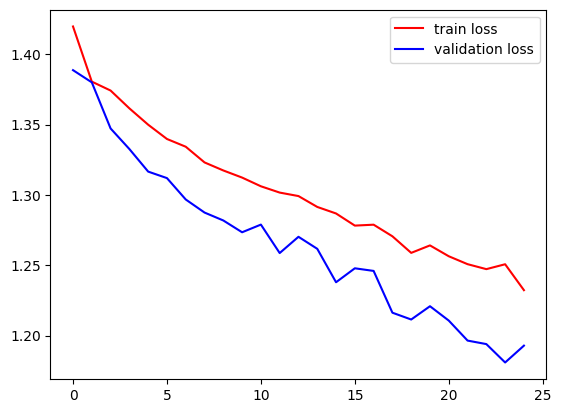

In [ ]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], color='red', label='train loss')
plt.plot(history.history['val_loss'], color='blue', label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

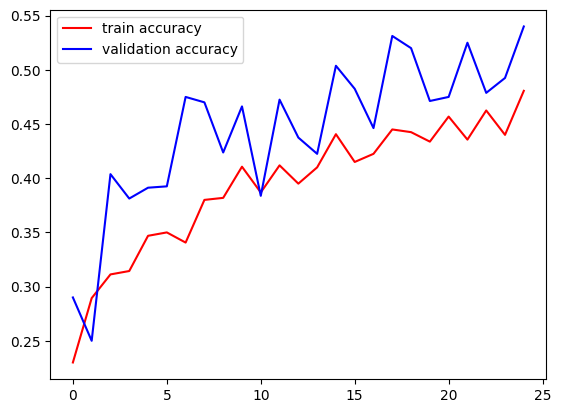

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train accuracy')
plt.plot(history.history['val_accuracy'],color='blue',label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.show()

In [ ]:
model_save_path = '/content/drive/MyDrive/Models/Model_20-04.h5'
history.model.save(model_save_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


50/51 [============================>.] - ETA: 0s

51/51 [==============================] - 9s 143ms/step
Accuracy: 24.38%


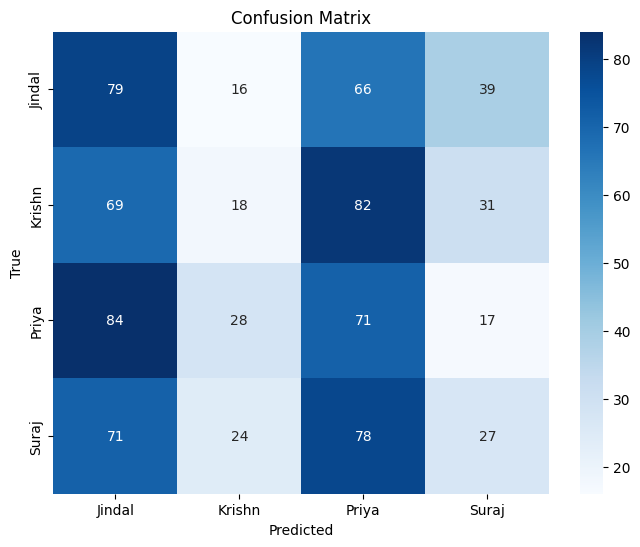


Classification Report:
              precision    recall  f1-score   support

      Jindal       0.26      0.40      0.31       200
      Krishn       0.21      0.09      0.13       200
       Priya       0.24      0.35      0.29       200
       Suraj       0.24      0.14      0.17       200

    accuracy                           0.24       800
   macro avg       0.24      0.24      0.22       800
weighted avg       0.24      0.24      0.22       800



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model on the validation set
validation_generator.reset()  # Reset the generator to start from the beginning
#predictions = custom_model.predict(validation_generator, steps=validation_generator.samples // batch_size, verbose=1)
predictions = custom_model.predict(validation_generator, steps=validation_generator.samples // batch_size + 1, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Calculate accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f'Accuracy: {accuracy:.2%}')

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Display classification report with precision, recall, and F1-score
print('\nClassification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

Found 200 images belonging to 4 classes.
6/6 [==============================] - 42s 7s/step
Test Accuracy: 25.00%


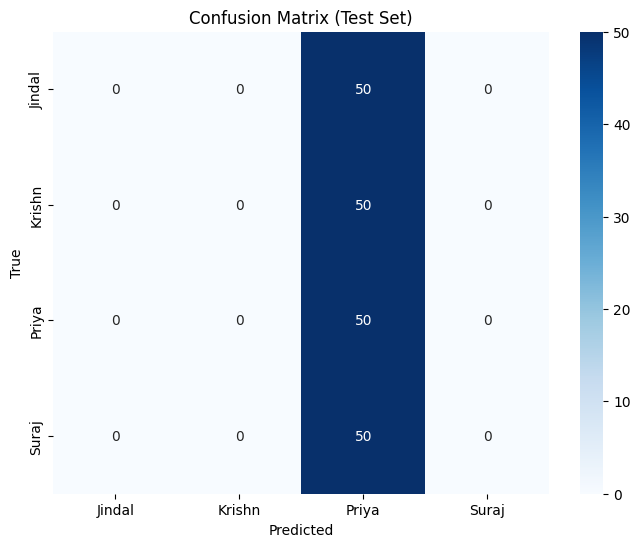


Classification Report (Test Set):
              precision    recall  f1-score   support

      Jindal       0.00      0.00      0.00        50
      Krishn       0.00      0.00      0.00        50
       Priya       0.25      1.00      0.40        50
       Suraj       0.00      0.00      0.00        50

    accuracy                           0.25       200
   macro avg       0.06      0.25      0.10       200
weighted avg       0.06      0.25      0.10       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import math
# Define the path to the preprocessed test dataset
test_data_dir = '/content/drive/MyDrive/OutputDataSet/Test'

# Create a data generator for the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Set shuffle to False to maintain order for evaluation
)

# Evaluate the model on the test set
test_generator.reset()  # Reset the generator to start from the beginning

steps = math.ceil(test_generator.samples / batch_size)
predictions_test = custom_model.predict(test_generator, steps=steps, verbose=1)
#predictions_test = custom_model.predict(test_generator, steps=test_generator.samples // batch_size, verbose=1)

#steps_per_epoch = test_generator.samples // batch_size
#predictions_test = custom_model.predict(test_generator, steps=steps_per_epoch, verbose=1)
predicted_classes_test = np.argmax(predictions_test, axis=1)



true_classes_test = test_generator.classes

# Calculate accuracy on the test set
accuracy_test = accuracy_score(true_classes_test, predicted_classes_test)
print(f'Test Accuracy: {accuracy_test:.2%}')

# Generate and display the confusion matrix for the test set
conf_matrix_test = confusion_matrix(true_classes_test, predicted_classes_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Set)')
plt.show()

# Display classification report with precision, recall, and F1-score for the test set
print('\nClassification Report (Test Set):')
print(classification_report(true_classes_test, predicted_classes_test, target_names=class_labels))

In [ ]:
from keras.preprocessing import image
import numpy as np

# Function to preprocess a single image for prediction
def preprocess_single_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Example usage to make predictions on a single image
new_image_path = '/content/drive/MyDrive/OutputDataSet/Test/Priya/Img 356.jpg'  # Replace with the path to the new image
preprocessed_new_image = preprocess_single_image(new_image_path)

# Make prediction
prediction = custom_model.predict(preprocessed_new_image)
predicted_class_index = np.argmax(prediction)
predicted_class_label = class_labels[predicted_class_index]

# Display the predicted class label
print(f"Predicted class: {predicted_class_label}")


1/1 [==============================] - 0s 449ms/step
Predicted class: Priya
